In [ ]:
Morgan


In [1]:
from tensorflow import keras
import tensorflow as tf
#import os
import pandas as pd
import numpy as np
#from rdkit import Chem
#from rdkit.Chem import Draw, Descriptors
#from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
#from keras import optimizers
#from tqdm import tqdm
#%matplotlib inline
from tensorflow.keras import layers
from tensorflow import nn
import collections
#from hyperopt import Trials, STATUS_OK, tpe
#from hyperas import optim
#from hyperas.distributions import choice, uniform
from rdkit.Chem import Descriptors
from rdkit import Chem
#from tensorflow.keras.mixed_precision import LossScaleOptimizer
#policy = LossScaleOptimizer('mixed_float16')
#mixed_precision.set_policy(policy)
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, accuracy_score, multilabel_confusion_matrix

In [2]:
def get_best_s():
    zest = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
    zesp = 0.2
    zel = []
    maxpr = 0
    best_nr = 0
    bad_count = 0
    for zzyz in range(0,100):

        try:
            preds1 = pred_model.predict(X_test2,verbose=0,batch_size=512)
            #print(preds1)
            #print(y_test2)
            preds1[preds1>=zesp] = 1
            preds1[preds1<1-zesp] = 0
            klkl = accuracy_score(y_test2_2, preds1)

            if klkl > maxpr:
                maxpr = klkl
                best_nr = zesp
            #print (klkl)
        except:
            bad_count +=1
        if bad_count >4:
            break
        zesp+=0.005
        zel.append(klkl)
    #print(best_nr)
    #plt.plot(zel)
    print(maxpr)
    #print(np.array(zel).max())
    #plt.plot(zel)
    return best_nr

In [3]:
data = pd.read_csv('pur_nord_5.csv', sep="\t",low_memory=False)
X_train = np.load("X_train_n_5.npy")

In [4]:
len(data)

454259

In [5]:
X_train_flat = X_train.reshape((len(X_train), np.prod(X_train.shape[1:])))

In [6]:
charset_t = collections.Counter((" ".join(list(data.crude))).split(' '))
print(charset_t)
charset_t=set(charset_t)
char_to_int_t = dict((c,i) for i,c in enumerate(charset_t))
int_to_char_t = dict((i,c) for i,c in enumerate(charset_t))
print(char_to_int_t)
embed_t =  len(charset_t)
print(embed_t)
one_hot_y = np.zeros((len(data), (len(charset_t)) ),dtype=np.int8)
len(one_hot_y[0])
for i,nam in enumerate(data['crude']):
    list_short = list(nam.split(" "))
    first = True
    for z, name in enumerate(list_short):
        if first == True:
            one_hot_y[i][char_to_int_t[name]] = 1
            #first = False
        #elif first !=True:
        #    one_hot_y[i][char_to_int_t[name]+11] = 1
            
Y_train = np.array(one_hot_y)

Counter({'ethyl_acetate': 283612, 'hexane': 173175, 'dichloromethane': 95159, 'methanol': 94029, 'chloroform': 35091, 'petroleum_ether': 18849, 'diethyl_ether': 8825, 'toluene': 8484, 'acetone': 6821, 'ethanol': 3804})
{'toluene': 0, 'acetone': 1, 'diethyl_ether': 2, 'ethanol': 3, 'petroleum_ether': 4, 'hexane': 5, 'dichloromethane': 6, 'methanol': 7, 'ethyl_acetate': 8, 'chloroform': 9}
10


In [7]:
X_train2, X_test2, y_train2_2,y_test2_2  = train_test_split(X_train,Y_train, test_size=0.1,shuffle=True)

In [32]:
######## LSTM ~~~~~~~~~~~~~~
encoding_dim = 512  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# This is our input image
input_img = keras.Input(shape=(8,512,))
# "encoded" is the encoded representation of the input
encoded = layers.LSTM(encoding_dim)(input_img)
# "decoded" is the lossy reconstruction of the input

decoded = layers.Dense(4096, activation='sigmoid')(encoded)
#resh = layers.Reshape((8,512))(decoded)
# This model maps an input to its reconstruction
autoencoder = keras.Model(input_img, decoded)
#encoder = keras.Model(input_img, encoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
encoder = keras.Model(input_img, encoded)
encoder.compile(optimizer='adam', loss='binary_crossentropy')
encoder.summary()

Model: "model_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 8, 512)]          0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 512)               2099200   
Total params: 2,099,200
Trainable params: 2,099,200
Non-trainable params: 0
_________________________________________________________________


In [ ]:
encoder = keras.Model(input_img, encoded)
encoder.compile(optimizer='adam', loss='binary_crossentropy')

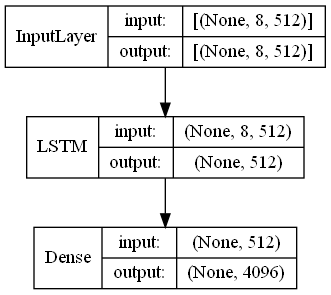

In [3]:
tf.keras.utils.plot_model(
    autoencoder,
    to_file="model.png",show_shapes=True,show_layer_names=False)

In [33]:
history=autoencoder.fit(X_train, X_train_flat,epochs=20,batch_size=512,shuffle=True)

Epoch 1/20
888/888 [==============================] - 15s 15ms/step - loss: 0.1474
Epoch 2/20
888/888 [==============================] - 14s 15ms/step - loss: 0.1076
Epoch 3/20
888/888 [==============================] - 14s 16ms/step - loss: 0.0930
Epoch 4/20
888/888 [==============================] - 14s 16ms/step - loss: 0.0869
Epoch 5/20
888/888 [==============================] - 14s 16ms/step - loss: 0.0817
Epoch 6/20
888/888 [==============================] - 14s 16ms/step - loss: 0.0753
Epoch 7/20
888/888 [==============================] - 14s 16ms/step - loss: 0.0681
Epoch 8/20
888/888 [==============================] - 14s 16ms/step - loss: 0.0611
Epoch 9/20
888/888 [==============================] - 14s 16ms/step - loss: 0.0558
Epoch 10/20
888/888 [==============================] - 14s 16ms/step - loss: 0.0517
Epoch 11/20
888/888 [==============================] - 14s 16ms/step - loss: 0.0476
Epoch 12/20
888/888 [==============================] - 14s 16ms/step - loss: 0.0442
E

KeyboardInterrupt: 

In [20]:
X_train[:1]

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]]], dtype=int8)

In [34]:
aa = encoder.predict(X_trainv)

In [35]:
aaa=np.reshape(aa,(16,32))

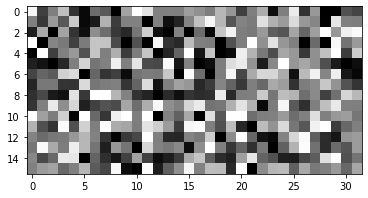

In [36]:
plt.imshow(aaa, cmap='gray', interpolation='nearest')
plt.show()

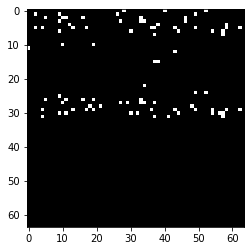

In [31]:
plt.imshow(np.reshape(X_train[0],(64,64)), cmap='gray', interpolation='nearest')
plt.show()

In [10]:
input_img = keras.Input(shape=(8,512,))

#input_to_model = encoder
#x = layers.Dense(32,activation='relu')(input_to_model)
'''
enc2 = encoder.layers[-8](input_img)
enc2 = encoder.layers[-7](enc2)
enc2 = encoder.layers[-6](enc2)
enc2 = encoder.layers[-5](enc2)

enc2 = encoder.layers[-4](enc2)
enc2 = encoder.layers[-3](enc2)


enc2 = encoder.layers[-2](enc2)
'''
enc2 = autoencoder.layers[1](input_img)

#ls = layers.Dense(64, activation="relu")(enc2)
ls = layers.Dense(256, activation="relu")(enc2)
ls = layers.Dense(128, activation="relu")(ls)
p = layers.Dense(10, activation="sigmoid",dtype='float32',name="classification")(ls)


pred_model = keras.Model(input_img, p)
pred_model.compile(loss='binary_crossentropy', optimizer="adam", metrics='binary_accuracy')
pred_model.layers[1].trainable=False
pred_model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 8, 512)]          0         
_________________________________________________________________
lstm (LSTM)                  (None, 512)               2099200   
_________________________________________________________________
dense_1 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_2 (Dense)              (None, 128)               32896     
_________________________________________________________________
classification (Dense)       (None, 10)                1290      
Total params: 2,264,714
Trainable params: 165,514
Non-trainable params: 2,099,200
_________________________________________________________________


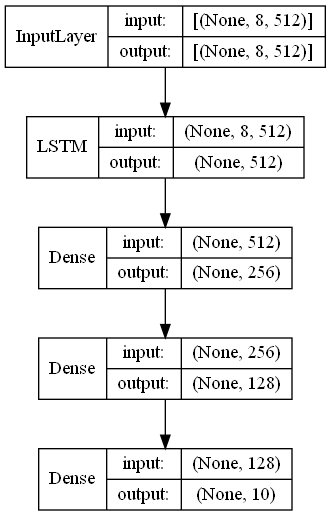

In [11]:
tf.keras.utils.plot_model(
    pred_model,
    to_file="model.png",show_shapes=True,show_layer_names=False)

In [16]:
history=pred_model.fit(X_train2, y_train2_2,epochs=40,batch_size=256,shuffle=True,validation_split=0.05)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Epoch 1/40
1518/1518 [==============================] - 14s 9ms/step - loss: 0.0075 - binary_accuracy: 0.9975 - val_loss: 0.0262 - val_binary_accuracy: 0.9921
Epoch 2/40
1518/1518 [==============================] - 14s 9ms/step - loss: 0.0069 - binary_accuracy: 0.9977 - val_loss: 0.0268 - val_binary_accuracy: 0.9919
Epoch 3/40
1518/1518 [==============================] - 14s 9ms/step - loss: 0.0069 - binary_accuracy: 0.9977 - val_loss: 0.0266 - val_binary_accuracy: 0.9919
Epoch 4/40
1518/1518 [==============================] - 14s 9ms/step - loss: 0.0066 - binary_accuracy: 0.9978 - val_loss: 0.0273 - val_binary_accuracy: 0.9916
Epoch 5/40
1518/1518 [==============================] - 14s 9ms/step - loss: 0.0060 - binary_accuracy: 0.9980 - val_loss: 0.0239 - val_binary_accuracy: 0.9928
Epoch 6/40
1518/1518 [==============================] - 14s 9ms/step - loss: 0.0063 - binary_accuracy: 0.9980 - val_loss: 0.0259 - val_binary_accuracy: 0.9923
Epoch 7/40
1518/1518 [========================

KeyboardInterrupt: 

In [17]:
preds1 = pred_model.predict(X_test2,verbose=1,batch_size=512)
#print(preds1)
#print(y_test2)
ac_sc = get_best_s()
preds1[preds1>=ac_sc] = 1
preds1[preds1<1-ac_sc] = 0
print (accuracy_score(y_test2_2, preds1))
print (classification_report(y_test2_2, preds1,target_names = char_to_int_t.keys(), digits = 3))
print (multilabel_confusion_matrix(y_test2_2, preds1))

89/89 [==============================] - 1s 6ms/step
0.9472548760621671
0.9472548760621671
                 precision    recall  f1-score   support

        toluene      0.974     0.935     0.954       836
        acetone      0.964     0.939     0.951       688
  diethyl_ether      0.921     0.951     0.936       899
        ethanol      0.949     0.967     0.958       362
petroleum_ether      0.956     0.947     0.952      1857
         hexane      0.969     0.979     0.974     17318
dichloromethane      0.980     0.956     0.968      9507
       methanol      0.979     0.964     0.972      9377
  ethyl_acetate      0.983     0.990     0.986     28441
     chloroform      0.976     0.955     0.966      3478

      micro avg      0.976     0.975     0.976     72763
      macro avg      0.965     0.958     0.962     72763
   weighted avg      0.976     0.975     0.976     72763
    samples avg      0.976     0.976     0.973     72763

[[[44569    21]
  [   54   782]]

 [[44714    24]
 

In [14]:
embed_t

10

In [41]:
X_train2, X_test2, y_train2_2,y_test2_2  = train_test_split(X_train_flat,Y_train, test_size=0.1,shuffle=True)

In [4]:
######## Dense ~~~~~~~~~~~~~~
encoding_dim = 512  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# This is our input image
input_img = keras.Input(shape=(4096,))
# "encoded" is the encoded representation of the input
encoded = layers.Dense(encoding_dim,activation='relu')(input_img)
# "decoded" is the lossy reconstruction of the input

decoded = layers.Dense(4096, activation='sigmoid')(encoded)
#resh = layers.Reshape((8,512))(encoded)
# This model maps an input to its reconstruction
autoencoder = keras.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 4096)]            0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               2097664   
_________________________________________________________________
dense_2 (Dense)              (None, 4096)              2101248   
Total params: 4,198,912
Trainable params: 4,198,912
Non-trainable params: 0
_________________________________________________________________


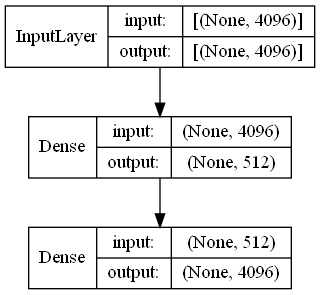

In [5]:
tf.keras.utils.plot_model(
    autoencoder,
    to_file="model.png",show_shapes=True,show_layer_names=False)

In [40]:
history=autoencoder.fit(X_train_flat, X_train_flat,epochs=20,batch_size=512,shuffle=True)

Epoch 1/20
888/888 [==============================] - 6s 6ms/step - loss: 0.1254
Epoch 2/20
888/888 [==============================] - 6s 6ms/step - loss: 0.0381
Epoch 3/20
888/888 [==============================] - 6s 6ms/step - loss: 0.0211
Epoch 4/20
888/888 [==============================] - 6s 6ms/step - loss: 0.0163
Epoch 5/20
888/888 [==============================] - 6s 6ms/step - loss: 0.0143
Epoch 6/20
888/888 [==============================] - 6s 6ms/step - loss: 0.0131
Epoch 7/20
888/888 [==============================] - 6s 6ms/step - loss: 0.0123
Epoch 8/20
888/888 [==============================] - 6s 6ms/step - loss: 0.0118
Epoch 9/20
888/888 [==============================] - 6s 6ms/step - loss: 0.0113
Epoch 10/20
888/888 [==============================] - 6s 6ms/step - loss: 0.0110
Epoch 11/20
888/888 [==============================] - 6s 6ms/step - loss: 0.0107
Epoch 12/20
888/888 [==============================] - 6s 6ms/step - loss: 0.0105
Epoch 13/20
888/888 [====

In [42]:
input_img = keras.Input(shape=(4096,))

#input_to_model = encoder
#x = layers.Dense(32,activation='relu')(input_to_model)

'''
enc2 = encoder.layers[-8](input_img)
enc2 = encoder.layers[-7](enc2)
enc2 = encoder.layers[-6](enc2)
enc2 = encoder.layers[-5](enc2)

enc2 = encoder.layers[-4](enc2)
enc2 = encoder.layers[-3](enc2)


enc2 = encoder.layers[-2](enc2)
'''
enc2 = autoencoder.layers[1](input_img)

#ls = layers.Dense(64, activation="relu")(enc2)
ls = layers.Dense(256, activation="relu")(enc2)
ls = layers.Dense(128, activation="relu")(ls)
p = layers.Dense(10, activation="sigmoid",dtype='float32',name="classification")(ls)


pred_model = keras.Model(input_img, p)
pred_model.compile(loss='binary_crossentropy', optimizer="adam", metrics='binary_accuracy')
pred_model.layers[1].trainable=False
pred_model.summary()

Model: "model_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_16 (InputLayer)        [(None, 4096)]            0         
_________________________________________________________________
dense_25 (Dense)             (None, 512)               2097664   
_________________________________________________________________
dense_27 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_28 (Dense)             (None, 128)               32896     
_________________________________________________________________
classification (Dense)       (None, 10)                1290      
Total params: 2,263,178
Trainable params: 165,514
Non-trainable params: 2,097,664
_________________________________________________________________


Epoch 1/40
1518/1518 [==============================] - 7s 4ms/step - loss: 0.3010 - binary_accuracy: 0.8702 - val_loss: 0.2640 - val_binary_accuracy: 0.8850
Epoch 2/40
1518/1518 [==============================] - 6s 4ms/step - loss: 0.2513 - binary_accuracy: 0.8915 - val_loss: 0.2365 - val_binary_accuracy: 0.9001
Epoch 3/40
1518/1518 [==============================] - 6s 4ms/step - loss: 0.2085 - binary_accuracy: 0.9133 - val_loss: 0.2119 - val_binary_accuracy: 0.9120
Epoch 4/40
1518/1518 [==============================] - 7s 4ms/step - loss: 0.1646 - binary_accuracy: 0.9339 - val_loss: 0.1979 - val_binary_accuracy: 0.9200
Epoch 5/40
1518/1518 [==============================] - 7s 4ms/step - loss: 0.1277 - binary_accuracy: 0.9499 - val_loss: 0.1859 - val_binary_accuracy: 0.9272
Epoch 6/40
1518/1518 [==============================] - 6s 4ms/step - loss: 0.1003 - binary_accuracy: 0.9613 - val_loss: 0.1878 - val_binary_accuracy: 0.9304
Epoch 7/40
1518/1518 [==============================

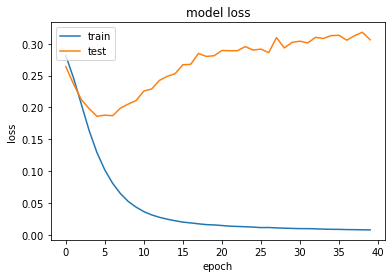

In [44]:
history=pred_model.fit(X_train2, y_train2_2,epochs=40,batch_size=256,shuffle=True,validation_split=0.05)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [45]:
preds1 = pred_model.predict(X_test2,verbose=1,batch_size=512)
#print(preds1)
#print(y_test2)
ac_sc = get_best_s()
preds1[preds1>=ac_sc] = 1
preds1[preds1<1-ac_sc] = 0
print (accuracy_score(y_test2_2, preds1))
print (classification_report(y_test2_2, preds1))
print (multilabel_confusion_matrix(y_test2_2, preds1))

89/89 [==============================] - 0s 2ms/step
0.6898912517060715
0.6898912517060715
              precision    recall  f1-score   support

           0       0.80      0.73      0.76      3547
           1       0.80      0.80      0.80      9529
           2       0.90      0.92      0.91     28310
           3       0.69      0.56      0.62       972
           4       0.84      0.84      0.84     17324
           5       0.72      0.66      0.69      1911
           6       0.82      0.61      0.70       691
           7       0.76      0.65      0.70       846
           8       0.88      0.80      0.83      9432
           9       0.74      0.59      0.65       341

   micro avg       0.85      0.84      0.85     72903
   macro avg       0.79      0.72      0.75     72903
weighted avg       0.85      0.84      0.85     72903
 samples avg       0.84      0.84      0.83     72903

[[[41241   638]
  [  975  2572]]

 [[33953  1944]
  [ 1947  7582]]

 [[14119  2997]
  [ 2237 260

In [46]:
X_train2, X_test2, y_train2_2,y_test2_2  = train_test_split(X_train,Y_train, test_size=0.1,shuffle=True)

In [7]:
encoding_dim = 512  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# This is our input image
input_img = keras.Input(shape=(8,512,))
# "encoded" is the encoded representation of the input
a = layers.Permute((2,1))(input_img)
x = layers.Conv1D(256,12,activation="relu")(a)
x1 = layers.MaxPooling1D(2)(x)
x2 = layers.Conv1D(128,10, activation='relu')(x1)
x3 = layers.MaxPooling1D(2)(x2)
x3 = layers.Conv1D(64,10, activation='relu')(x3)
x4 = layers.AveragePooling1D()(x3)
flat = layers.Flatten()(x4)
encoded = layers.Dense(encoding_dim)(flat)
#d1 = layers.Dense(64)(encoded)
d2 = layers.Reshape((128,4))(encoded)
d3 = layers.Conv1D(256,1,strides=1, activation='relu')(d2)
d4 = layers.UpSampling1D(2)(d3)
#d4 = layers.UpSampling1D(2)(d4)
d5 = layers.Conv1D(256,1,strides=1, activation='relu')(d4)
d6 = layers.UpSampling1D(2)(d5)
#d6 = layers.UpSampling1D(2)(d6)
#d6 = layers.Conv1D(256,1,strides=1, activation='relu')(d6)
#d7 =layers. UpSampling1D(2)(d6)
decoded = layers.Conv1D(8,1,strides=1, activation='sigmoid')(d6)
decoded = layers.Permute((2,1))(decoded)
autoencoder = keras.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 8, 512)]          0         
_________________________________________________________________
permute_4 (Permute)          (None, 512, 8)            0         
_________________________________________________________________
conv1d_14 (Conv1D)           (None, 501, 256)          24832     
_________________________________________________________________
max_pooling1d_4 (MaxPooling1 (None, 250, 256)          0         
_________________________________________________________________
conv1d_15 (Conv1D)           (None, 241, 128)          327808    
_________________________________________________________________
max_pooling1d_5 (MaxPooling1 (None, 120, 128)          0         
_________________________________________________________________
conv1d_16 (Conv1D)           (None, 111, 64)           8198

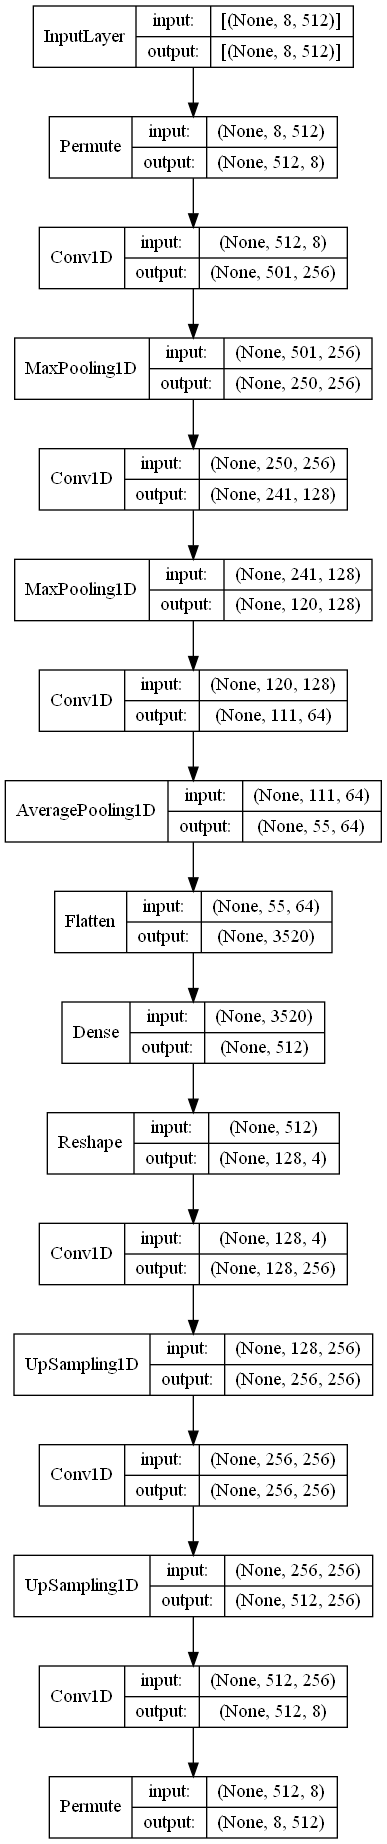

In [9]:
tf.keras.utils.plot_model(
    autoencoder,
    to_file="model.png",show_shapes=True,show_layer_names=False)

In [51]:
history=autoencoder.fit(X_train, X_train,epochs=20,batch_size=512,shuffle=True)

Epoch 1/20
888/888 [==============================] - 115s 127ms/step - loss: 0.1428
Epoch 2/20
 16/888 [..............................] - ETA: 1:50 - loss: 0.1089

KeyboardInterrupt: 

In [56]:
input_img = keras.Input(shape=(8,512,))

#input_to_model = encoder
#x = layers.Dense(32,activation='relu')(input_to_model)

enc2 = autoencoder.layers[1](input_img)
enc2 = autoencoder.layers[2](enc2)
enc2 = autoencoder.layers[3](enc2)
enc2 = autoencoder.layers[4](enc2)

enc2 = autoencoder.layers[5](enc2)
enc2 = autoencoder.layers[6](enc2)


enc2 = autoencoder.layers[7](enc2)
enc2 = autoencoder.layers[8](enc2)
enc2 = autoencoder.layers[9](enc2)
#ls = layers.Dense(64, activation="relu")(enc2)
ls = layers.Dense(128, activation="relu")(enc2)
ls = layers.Dense(64, activation="relu")(ls)
p = layers.Dense(10, activation="sigmoid",dtype='float32',name="classification")(ls)


pred_model = keras.Model(input_img, p)
pred_model.compile(loss='binary_crossentropy', optimizer="adam", metrics='binary_accuracy')
pred_model.layers[1].trainable=False
pred_model.layers[2].trainable=False
pred_model.layers[3].trainable=False
pred_model.layers[4].trainable=False
pred_model.layers[5].trainable=False
pred_model.layers[6].trainable=False
pred_model.layers[7].trainable=False
pred_model.layers[8].trainable=False
pred_model.layers[9].trainable=False
pred_model.summary()

Model: "model_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_21 (InputLayer)        [(None, 8, 512)]          0         
_________________________________________________________________
permute_2 (Permute)          (None, 512, 8)            0         
_________________________________________________________________
conv1d_7 (Conv1D)            (None, 501, 256)          24832     
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 250, 256)          0         
_________________________________________________________________
conv1d_8 (Conv1D)            (None, 241, 128)          327808    
_________________________________________________________________
max_pooling1d_3 (MaxPooling1 (None, 120, 128)          0         
_________________________________________________________________
conv1d_9 (Conv1D)            (None, 111, 64)           819

In [57]:
history=pred_model.fit(X_train2, y_train2_2,epochs=20,batch_size=256,shuffle=True,validation_split=0.05)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Epoch 1/20
1518/1518 [==============================] - 23s 15ms/step - loss: 0.3247 - binary_accuracy: 0.8587 - val_loss: 0.3053 - val_binary_accuracy: 0.8639
Epoch 2/20
1518/1518 [==============================] - 22s 15ms/step - loss: 0.3037 - binary_accuracy: 0.8654 - val_loss: 0.3022 - val_binary_accuracy: 0.8657
Epoch 3/20
1518/1518 [==============================] - 22s 15ms/step - loss: 0.3021 - binary_accuracy: 0.8660 - val_loss: 0.3049 - val_binary_accuracy: 0.8644
Epoch 4/20
1518/1518 [==============================] - 22s 15ms/step - loss: 0.3021 - binary_accuracy: 0.8661 - val_loss: 0.3021 - val_binary_accuracy: 0.8660
Epoch 5/20
1518/1518 [==============================] - 22s 15ms/step - loss: 0.3005 - binary_accuracy: 0.8666 - val_loss: 0.3026 - val_binary_accuracy: 0.8662
Epoch 6/20
 113/1518 [=>............................] - ETA: 20s - loss: 0.3013 - binary_accuracy: 0.8657

KeyboardInterrupt: 

In [58]:
preds1 = pred_model.predict(X_test2,verbose=1,batch_size=512)
#print(preds1)
#print(y_test2)
ac_sc = get_best_s()
preds1[preds1>=ac_sc] = 1
preds1[preds1<1-ac_sc] = 0
print (accuracy_score(y_test2_2, preds1))
print (classification_report(y_test2_2, preds1))
print (multilabel_confusion_matrix(y_test2_2, preds1))

89/89 [==============================] - 2s 24ms/step
0.2825034121428257
0.2825034121428257
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      3416
           1       0.40      0.05      0.09      9619
           2       0.63      0.99      0.77     28392
           3       0.00      0.00      0.00       915
           4       0.46      0.67      0.55     17333
           5       0.00      0.00      0.00      1897
           6       0.00      0.00      0.00       667
           7       0.00      0.00      0.00       845
           8       0.42      0.31      0.36      9309
           9       0.00      0.00      0.00       389

   micro avg       0.55      0.59      0.57     72782
   macro avg       0.19      0.20      0.18     72782
weighted avg       0.46      0.59      0.49     72782
 samples avg       0.56      0.61      0.56     72782

[[[42010     0]
  [ 3416     0]]

 [[35114   693]
  [ 9152   467]]

 [[  341 16693]
  [  192 28

C:\Users\XXX\.conda\envs\TF_24\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


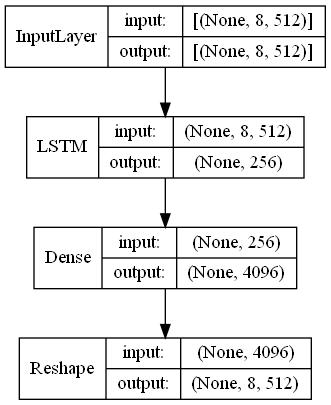

In [4]:
tf.keras.utils.plot_model(
    autoencoder,
    to_file="model.png",show_shapes=True,show_layer_names=False)

In [3]:
tf.keras.utils.plot_model(
    autoencoder,
    to_file="model.png",show_shapes=True,show_layer_names=False)

('Failed to import pydot. You must `pip install pydot` and install graphviz (https://graphviz.gitlab.io/download/), ', 'for `pydotprint` to work.')


In [59]:
######## Dense ~~~~~~~~~~~~~~
encoding_dim = 512  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# This is our input image
input_img = keras.Input(shape=(4096,))
# "encoded" is the encoded representation of the input
th = layers.Dense(1024,activation="relu")(input_img)
encoded = layers.Dense(encoding_dim,activation='relu')(th)
# "decoded" is the lossy reconstruction of the input
th2 = layers.Dense(1024,activation="relu")(encoded)
decoded = layers.Dense(4096, activation='sigmoid')(th2)
#resh = layers.Reshape((8,512))(encoded)
# This model maps an input to its reconstruction
autoencoder = keras.Model(input_img, decoded)

In [141]:
######## Dense ~~~~~~~~~~~~~~
encoding_dim = 512  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# This is our input image
input_img = keras.Input(shape=(8,512,))
# "encoded" is the encoded representation of the input
a = layers.Permute((2,1))(input_img)
x = layers.Conv1D(256,12,activation="relu")(a)
x1 = layers.MaxPooling1D(2)(x)
x2 = layers.Conv1D(128,10, activation='relu')(x1)
x3 = layers.MaxPooling1D(2)(x2)
x3 = layers.Conv1D(64,10, activation='relu')(x3)
x4 = layers.AveragePooling1D()(x3)
flat = layers.Flatten()(x4)
encoded = layers.Dense(encoding_dim)(flat)
d1 = layers.Dense(64)(encoded)
d2 = layers.Reshape((16,4))(d1)
d3 = layers.Conv1D(256,1,strides=1, activation='relu')(d2)
d4 = layers.UpSampling1D(2)(d3)
d4 = layers.UpSampling1D(2)(d4)
d5 = layers.Conv1D(256,1,strides=1, activation='relu')(d4)
d6 = layers.UpSampling1D(2)(d5)
d6 = layers.UpSampling1D(2)(d6)
d6 = layers.Conv1D(256,1,strides=1, activation='relu')(d6)
d7 =layers. UpSampling1D(2)(d6)
decoded = layers.Conv1D(8,1,strides=1, activation='sigmoid')(d7)
decoded = layers.Permute((2,1))(decoded)
autoencoder = keras.Model(input_img, decoded)

In [142]:
encoder = keras.Model(input_img, encoded)

In [62]:
encoded_input = keras.Input(shape=(encoding_dim,))
# Retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-2]
decoder_layer2 = autoencoder.layers[-1]
# Create the decoder model
decoder = keras.Model(encoded_input, decoder_layer2(encoded_input))

ValueError: Dimensions must be equal, but are 512 and 1024 for '{{node dense_23/MatMul}} = MatMul[T=DT_FLOAT, transpose_a=false, transpose_b=false](Placeholder, dense_23/MatMul/ReadVariableOp)' with input shapes: [?,512], [1024,4096].

In [143]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [144]:
autoencoder.summary()

Model: "model_35"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_42 (InputLayer)        [(None, 8, 512)]          0         
_________________________________________________________________
permute_20 (Permute)         (None, 512, 8)            0         
_________________________________________________________________
conv1d_78 (Conv1D)           (None, 501, 256)          24832     
_________________________________________________________________
max_pooling1d_30 (MaxPooling (None, 250, 256)          0         
_________________________________________________________________
conv1d_79 (Conv1D)           (None, 241, 128)          327808    
_________________________________________________________________
max_pooling1d_31 (MaxPooling (None, 120, 128)          0         
_________________________________________________________________
conv1d_80 (Conv1D)           (None, 111, 64)           819

In [11]:
print(X_train.shape)
print(X_test.shape)

(1754061, 8, 512)
(1754061, 4096)


In [145]:
history=autoencoder.fit(X_train, X_train,epochs=25,batch_size=512,shuffle=True)

Epoch 1/25
3426/3426 [==============================] - 430s 124ms/step - loss: 0.1151
Epoch 2/25
3426/3426 [==============================] - 428s 125ms/step - loss: 0.0968
Epoch 3/25
3426/3426 [==============================] - 427s 125ms/step - loss: 0.0953
Epoch 4/25
3426/3426 [==============================] - 427s 125ms/step - loss: 0.0947
Epoch 5/25
3426/3426 [==============================] - 427s 125ms/step - loss: 0.0944
Epoch 6/25
3426/3426 [==============================] - 427s 125ms/step - loss: 0.0942
Epoch 7/25
3426/3426 [==============================] - 426s 124ms/step - loss: 0.0940
Epoch 8/25
3361/3426 [============================>.] - ETA: 8s - loss: 0.0939

KeyboardInterrupt: 

In [13]:
4096/32

128.0

In [43]:
Y_train.shape

(1754061, 20)

In [22]:
cca=autoencoder.predict(X_test2,batch_size=512,verbose=1)

NameError: name 'X_test2' is not defined

In [131]:
cca[0]

array([-0.7937768 ,  0.651528  ,  0.1007852 ,  0.6734864 ,  0.5746062 ,
       -0.0087104 , -0.20331836,  0.49023637, -0.57273585, -0.19399995,
       -0.16572641,  0.14164943,  0.06269745,  0.3651145 ,  0.06234551,
       -0.3049409 ,  0.40658417,  0.14946294,  0.4125324 ,  0.9884156 ,
       -0.64446545, -0.4022359 ,  0.22626491, -0.6824732 , -0.3072537 ,
        0.22517806,  0.1348609 , -0.31462744,  0.3044423 , -0.36948717,
        0.6231832 , -0.5494398 ], dtype=float32)

In [108]:
encoder.summary()

Model: "model_27"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_31 (InputLayer)        [(None, 8, 512)]          0         
_________________________________________________________________
permute_8 (Permute)          (None, 512, 8)            0         
_________________________________________________________________
conv1d_38 (Conv1D)           (None, 510, 8)            200       
_________________________________________________________________
max_pooling1d_18 (MaxPooling (None, 255, 8)            0         
_________________________________________________________________
conv1d_39 (Conv1D)           (None, 253, 4)            100       
_________________________________________________________________
max_pooling1d_19 (MaxPooling (None, 126, 4)            0         
_________________________________________________________________
average_pooling1d_8 (Average (None, 63, 4)             0  

In [14]:
data = pd.read_csv('dadfre24.csv', sep="\t",low_memory=False)
data["crude"] = data["crude"].str.replace('methylene_chloride','dichloromethane')
charset_t = collections.Counter((" ".join(list(data.crude))).split(' '))
print(charset_t)
charset_t=set(charset_t)
char_to_int_t = dict((c,i) for i,c in enumerate(charset_t))
int_to_char_t = dict((i,c) for i,c in enumerate(charset_t))
print(char_to_int_t)
embed_t =  len(charset_t)
print(embed_t)

Counter({'methanol': 873067, 'dichloromethane': 818973, 'hexane': 509199, 'ethyl_acetate': 494441, 'chloroform': 236411, 'diethyl_ether': 49166, 'acetone': 46636, 'petroleum_ether': 43696, 'toluene': 27948, 'ethanol': 21354})
{'toluene': 0, 'ethanol': 1, 'ethyl_acetate': 2, 'dichloromethane': 3, 'methanol': 4, 'acetone': 5, 'diethyl_ether': 6, 'petroleum_ether': 7, 'hexane': 8, 'chloroform': 9}
10


In [15]:
data

,RP,crude
0,O=C1NC=Nc2c1cc1OCCOc1c2.O=P(Cl)(Cl)Cl.N.Clc(c1...,chloroform
1,O=C1NC=Nc2c1cc1OCCOc1c2.O=P(Cl)(Cl)Cl.Clc(c1c2...,chloroform
2,O=C1NC=Nc2c1cc1OCCOc1c2.N.O=P(Cl)(Cl)Cl.Clc(c1...,chloroform
3,O=C1NC=Nc2c1cc1OCCOc1c2.N.Clc(c1c2)ncnc1cc1c2O...,chloroform
4,O=C1NC=Nc2c1cc1OCCOc1c2.Clc(c1c2)ncnc1cc1c2OCC...,chloroform
...,...,...
1754056,COc1ccc(B(O)O)cc1.[O-]C([O-])=O.O=Cc1cc(Br)c(-...,hexane ethyl_acetate
1754057,COc1ccc(B(O)O)cc1.[O-]C([O-])=O.O=Cc1cc(Br)c(-...,hexane ethyl_acetate
1754058,COc1ccc(B(O)O)cc1.[O-]C([O-])=O.O=Cc1cc(Br)c(-...,hexane ethyl_acetate
1754059,COc1ccc(B(O)O)cc1.[O-]C([O-])=O.O=Cc1cc(Br)c(-...,hexane ethyl_acetate


In [16]:
one_hot_y = np.zeros((len(data), (len(charset_t))*2 ),dtype=np.int8)
len(one_hot_y[0])
for i,nam in enumerate(data['crude']):
    list_short = list(nam.split(" "))
    first = True
    for z, name in enumerate(list_short):
        if first == True:
            one_hot_y[i][char_to_int_t[name]] = 1
            first = False
        elif first !=True:
            one_hot_y[i][char_to_int_t[name]+10] = 1
            
Y_train = np.array(one_hot_y)

In [120]:
input_img = keras.Input(shape=(8,512,))

#input_to_model = encoder
#x = layers.Dense(32,activation='relu')(input_to_model)
'''
enc2 = encoder.layers[-8](input_img)
enc2 = encoder.layers[-7](enc2)
enc2 = encoder.layers[-6](enc2)
enc2 = encoder.layers[-5](enc2)

enc2 = encoder.layers[-4](enc2)
enc2 = encoder.layers[-3](enc2)


enc2 = encoder.layers[-2](enc2)
enc2 = encoder.layers[-1](enc2)
'''
#ls = layers.Dense(64, activation="relu")(enc2)
ls = layers.Dense(128, activation="relu")(img_input)
ls = layers.Dense(64, activation="relu")(ls)
p = layers.Dense(20, activation="sigmoid",dtype='float32',name="classification")(ls)


pred_model = keras.Model(input_img, p)
pred_model.compile(loss='binary_crossentropy', optimizer="adam", metrics='binary_accuracy')

In [121]:
pred_model.layers[1].trainable=False
pred_model.layers[2].trainable=False
pred_model.layers[3].trainable=False
pred_model.layers[4].trainable=False
pred_model.layers[5].trainable=False
pred_model.layers[6].trainable=False
pred_model.layers[7].trainable=False
pred_model.layers[8].trainable=False

In [122]:
X_train2,X_test2,Y_train2,Y_test2 = X_train2, X_test2, y_train2_2,y_test2_2  = train_test_split(X_train,Y_train, test_size=0.1,shuffle=True)

In [123]:
pred_model.summary()

Model: "model_29"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_36 (InputLayer)        [(None, 8, 512)]          0         
_________________________________________________________________
permute_8 (Permute)          (None, 512, 8)            0         
_________________________________________________________________
conv1d_38 (Conv1D)           (None, 510, 8)            200       
_________________________________________________________________
max_pooling1d_18 (MaxPooling (None, 255, 8)            0         
_________________________________________________________________
conv1d_39 (Conv1D)           (None, 253, 4)            100       
_________________________________________________________________
max_pooling1d_19 (MaxPooling (None, 126, 4)            0         
_________________________________________________________________
average_pooling1d_8 (Average (None, 63, 4)             0  

In [124]:
history=pred_model.fit(X_train2, Y_train2,epochs=40,batch_size=1024,shuffle=True,validation_split=0.05)

Epoch 1/40
1465/1465 [==============================] - 10s 7ms/step - loss: 0.2676 - binary_accuracy: 0.8976 - val_loss: 0.2391 - val_binary_accuracy: 0.9111
Epoch 2/40
1465/1465 [==============================] - 9s 6ms/step - loss: 0.2382 - binary_accuracy: 0.9110 - val_loss: 0.2373 - val_binary_accuracy: 0.9112
Epoch 3/40
1465/1465 [==============================] - 9s 6ms/step - loss: 0.2369 - binary_accuracy: 0.9111 - val_loss: 0.2364 - val_binary_accuracy: 0.9114
Epoch 4/40
1465/1465 [==============================] - 9s 6ms/step - loss: 0.2355 - binary_accuracy: 0.9113 - val_loss: 0.2351 - val_binary_accuracy: 0.9116
Epoch 5/40
1465/1465 [==============================] - 9s 6ms/step - loss: 0.2342 - binary_accuracy: 0.9117 - val_loss: 0.2337 - val_binary_accuracy: 0.9120
Epoch 6/40
1465/1465 [==============================] - 9s 6ms/step - loss: 0.2329 - binary_accuracy: 0.9120 - val_loss: 0.2325 - val_binary_accuracy: 0.9122
Epoch 7/40
1465/1465 [=============================

In [30]:
#pred_model.compile(loss='binary_crossentropy', optimizer="adam", metrics='binary_accuracy')
pred_model.layers[1].trainable=True

In [125]:
from sklearn.metrics import classification_report, accuracy_score, multilabel_confusion_matrix
preds1 = pred_model.predict(X_test2,verbose=1,batch_size=512)
#print(preds1)
#print(y_test2)
preds1[preds1>=0.31] = 1
preds1[preds1<1-0.31] = 0
print (accuracy_score(Y_test2, preds1))
print (classification_report(Y_test2, preds1))
print (multilabel_confusion_matrix(Y_test2, preds1))

343/343 [==============================] - 1s 3ms/step
0.14986859133329913


C:\Users\XXX\.conda\envs\TF_24\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.73      0.03      0.06      2403
           1       0.52      0.02      0.03       634
           2       0.37      0.10      0.16     31414
           3       0.44      0.41      0.42     47292
           4       0.46      0.51      0.48     41082
           5       0.77      0.05      0.09      2351
           6       0.65      0.01      0.01      3506
           7       1.00      0.00      0.00      2155
           8       0.40      0.13      0.19     25968
           9       0.46      0.11      0.18     18602
          10       0.50      0.01      0.02       376
          11       0.00      0.00      0.00      1554
          12       0.41      0.02      0.03     17937
          13       0.45      0.40      0.42     34894
          14       0.46      0.54      0.50     46372
          15       0.52      0.09      0.15      2235
          16       0.52      0.01      0.02      1310
          17       0.20    

In [78]:
zest = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
zesp = 0.3
zel = []
maxpr = 0
best_nr = 0
bad_count = 0
for zzyz in range(0,100):
    
    try:
        preds1 = pred_model.predict(X_test2,verbose=0,batch_size=512)
        #print(preds1)
        #print(y_test2)
        preds1[preds1>=zesp] = 1
        preds1[preds1<1-zesp] = 0
        klkl = accuracy_score(Y_test2, preds1)
        
        if klkl > maxpr:
            maxpr = klkl
            best_nr = zesp
        #print (klkl)
    except:
        bad_count +=1
    if bad_count >4:
        break
    zesp+=0.005
    zel.append(klkl)
print(best_nr)
#plt.plot(zel)
print(maxpr)
print(np.array(zel).max())
plt.plot(zel)

0.36500000000000005
0.6569920242635698
0.6569920242635698


NameError: name 'plt' is not defined

In [ ]:
zest = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
zesp = 0.39
zel = []
maxpr = 0
best_nr = 0
bad_count = 0
for zzyz in range(0,40):
    
    try:
        preds1 = modelx.predict(X_test2,verbose=0,batch_size=512)
        #print(preds1)
        #print(y_test2)
        preds1[preds1>=zesp] = 1
        preds1[preds1<1-zesp] = 0
        klkl = accuracy_score(y_test2_2, preds1)
        
        if klkl > maxpr:
            maxpr = klkl
            best_nr = zesp
        #print (klkl)
    except:
        bad_count +=1
    if bad_count >4:
        break
    zesp+=0.001
    zel.append(klkl)
print(best_nr)
#plt.plot(zel)
print(maxpr)
print(np.array(zel).max())
plt.plot(zel)